In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
objects = pd.read_parquet('data_231206/objects_with_wise_20240105.parquet')
objects

,oid,ra,dec,submitter,alerceclass,AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,...,pmDE,e_pmDE,d2M,angDist,W1-W2,W2-W3,sgscore1,distpsnr1,sgmag1,srmag1
0,ZTF21acasmne,291.414602,-14.603520,amunoz,CV/Nova,None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.301667,2.888662,-999.0000,-999.0000
1,ZTF19aaonuwr,293.431251,21.348710,amunoz,LPV,J193343.50+212055.5,293.431260,21.348767,0.0336,0.0326,...,44.0,34.0,0.105,0.207602,0.038000,0.657,0.500000,0.162033,21.1831,18.5125
2,ZTF17aabhkmn,86.770569,0.308770,amunoz,YSO,J054705.00+001832.5,86.770857,0.309037,0.0359,0.0335,...,-680.0,36.0,1.293,1.412567,0.431001,1.651,0.970250,0.348792,18.7432,16.9576
3,ZTF18aatxhtl,192.578746,43.709578,amunoz,QSO,J125018.91+434234.4,192.578809,43.709580,0.1356,0.1253,...,412.0,476.0,NaN,0.162716,1.368000,2.701,0.987208,0.145086,18.8941,18.4898
4,ZTF18aaadfyl,156.578799,18.586220,amunoz,RSCVn,J102618.91+183510.4,156.578829,18.586238,0.0410,0.0386,...,110.0,54.0,0.172,0.122051,0.045000,0.189,0.995595,0.351454,15.3424,14.5392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41772,ZTF18aajbozk,269.038817,43.015037,amunoz,DSCT,J175609.32+430054.2,269.038844,43.015062,0.0413,0.0386,...,-50.0,57.0,0.112,0.116245,-0.003000,0.680,0.995000,0.135874,13.4420,13.3310
41773,ZTF22aaabppe,118.750583,42.769515,amunoz,SNIa,None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020417,2.631851,19.1993,19.1267
41774,ZTF19abxnoad,53.934294,4.828550,amunoz,AGN,J033544.24+044942.5,53.934351,4.828484,0.0381,0.0362,...,133.0,101.0,0.156,0.314975,1.140000,2.631,0.960958,0.572265,18.6816,18.2689
41775,ZTF23aaqniyk,266.581282,10.106150,amunoz,SNII,J174619.50+100622.2,266.581287,10.106179,0.0930,0.0680,...,NaN,NaN,2.732,0.103027,0.231000,3.783,0.500000,3.176741,-999.0000,20.2612


In [3]:
partitions = pd.read_parquet('data_231206/partitions.parquet')
partitions

,oid,alerceclass,partition
index,,,
23577,ZTF18adldhip,AGN,test
32093,ZTF19aasbgeb,QSO,test
17103,ZTF18aayfbqd,EA,test
6117,ZTF19ablyzbl,QSO,test
33717,ZTF18actabfv,YSO,test
...,...,...,...
41704,ZTF19acokmuo,AGN,validation_4
41708,ZTF18abxoxih,Blazar,validation_4
41716,ZTF18adbhpsf,Blazar,validation_4


In [4]:
training_partition = 'training_0'
po_tp = partitions[(partitions['alerceclass'] == 'Periodic-Other') & (partitions['partition'] == training_partition)]
po_tp

,oid,alerceclass,partition
index,,,
14,ZTF18abuszmh,Periodic-Other,training_0
74,ZTF19abahqnh,Periodic-Other,training_0
97,ZTF22abuhbev,Periodic-Other,training_0
98,ZTF20aaxbtan,Periodic-Other,training_0
148,ZTF19aapiwoj,Periodic-Other,training_0
...,...,...,...
41553,ZTF19aaabvjc,Periodic-Other,training_0
41581,ZTF21aagvhiq,Periodic-Other,training_0
41604,ZTF19abacosd,Periodic-Other,training_0


In [5]:
po_tp_coords = objects[objects['oid'].isin(po_tp['oid'])]
po_tp_coords

,oid,ra,dec,submitter,alerceclass,AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,...,pmDE,e_pmDE,d2M,angDist,W1-W2,W2-W3,sgscore1,distpsnr1,sgmag1,srmag1
14,ZTF18abuszmh,306.489647,-24.716426,amunoz,Periodic-Other,J202557.51-244258.6,306.489644,-24.716291,0.1266,0.1182,...,878.0,431.0,0.402,0.488286,0.132000,2.973000,0.955917,0.049878,17.4436,17.1391
74,ZTF19abahqnh,204.363553,-21.462345,amunoz,Periodic-Other,J133727.27-212744.4,204.363651,-21.462349,0.0398,0.0374,...,-28.0,28.0,0.459,0.327302,-0.002000,0.004000,0.500000,0.898442,12.4980,12.2440
98,ZTF22abuhbev,333.772941,-26.259881,amunoz,Periodic-Other,J221505.44-261534.7,333.772677,-26.259656,0.0471,0.0412,...,37.0,50.0,0.333,1.176000,0.002999,0.761001,0.999687,1.409443,13.4389,13.2778
99,ZTF20aaxbtan,235.119755,-24.901201,amunoz,Periodic-Other,J154028.73-245404.4,235.119741,-24.901249,0.0911,0.0869,...,314.0,285.0,0.253,0.177664,-0.108999,2.886000,1.000000,0.203426,18.9442,17.8816
150,ZTF19aapiwoj,137.864415,-24.718186,amunoz,Periodic-Other,J091127.45-244305.2,137.864404,-24.718127,0.0309,0.0297,...,106.0,31.0,0.165,0.216398,-0.044000,0.742000,1.000000,0.239972,13.9590,11.8310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41602,ZTF19aaabvjc,97.920485,-24.557655,amunoz,Periodic-Other,J063140.91-243328.3,97.920470,-24.557862,0.0412,0.0382,...,-1.0,41.0,0.119,0.748394,-0.038000,-0.117000,0.985833,1.758681,13.4510,13.0170
41630,ZTF21aagvhiq,102.116370,-26.712377,amunoz,Periodic-Other,None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.956875,2.135688,13.2035,13.9950
41653,ZTF19abacosd,213.564211,-26.626237,amunoz,Periodic-Other,J141415.41-263734.5,213.564223,-26.626273,0.1497,0.1405,...,276.0,331.0,0.659,0.133410,-0.073001,3.725001,1.000000,0.273882,17.4749,17.2910
41744,ZTF19aayhsje,296.148256,-25.393526,amunoz,Periodic-Other,J194435.57-252337.0,296.148222,-25.393631,0.0979,0.0939,...,502.0,302.0,0.391,0.392747,-0.198999,3.068000,0.994375,0.441767,17.1930,16.9124


In [6]:
southern = po_tp_coords['dec'] < -20
south_fraction = southern.astype(float).mean()
south_fraction

0.7412177985948478

In [7]:
southern_po_oids = po_tp_coords[southern]['oid'].values
northern_po_oids = po_tp_coords[~southern]['oid'].values

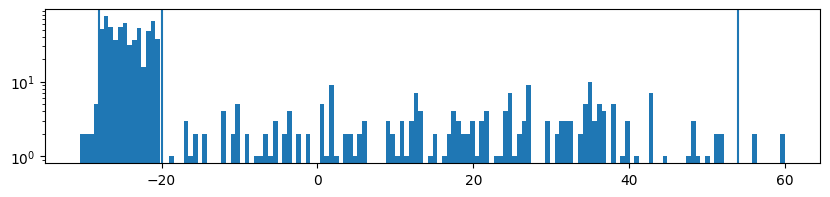

In [8]:
plt.figure(figsize=(10, 2))
plt.hist(po_tp_coords.dec, bins=150);
plt.semilogy()
plt.axvline(x=-28)
plt.axvline(x=-20)
plt.axvline(x=54)

In [9]:
n_not_to_be_replaced = ((~southern).astype(float).sum()) / (54 - (-20)) * (28-20)
n_not_to_be_replaced = int(np.ceil(n_not_to_be_replaced))
n_not_to_be_replaced

24

In [10]:
np.random.seed(0)
southern_not_to_be_replaced = np.random.choice(southern_po_oids, size=n_not_to_be_replaced, replace=False)
not_to_be_replaced = np.concatenate([northern_po_oids, southern_not_to_be_replaced])
to_be_replaced = list(set(po_tp.oid.values) - set(not_to_be_replaced))

In [11]:
len(to_be_replaced) + len(not_to_be_replaced) == len(po_tp)

True

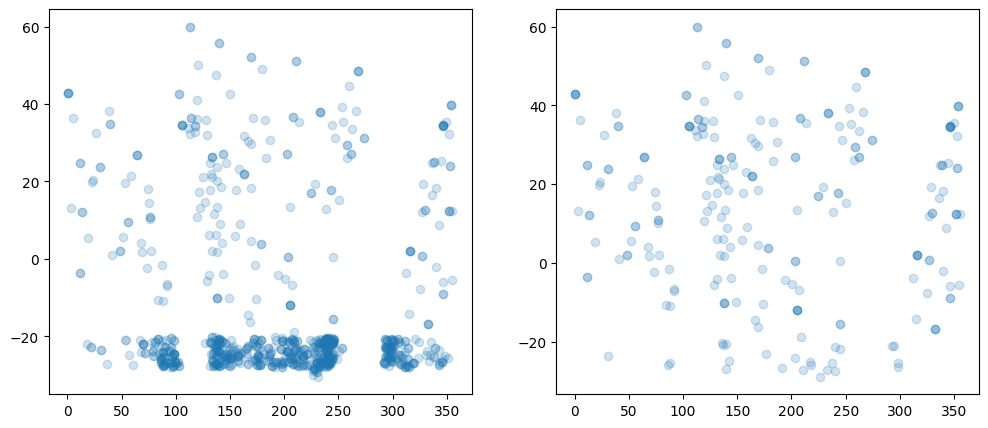

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(
    po_tp_coords.ra,
    po_tp_coords.dec,
    alpha=0.2
)

plt.subplot(1, 2, 2)
plt.scatter(
    po_tp_coords[po_tp_coords['oid'].isin(not_to_be_replaced)].ra,
    po_tp_coords[po_tp_coords['oid'].isin(not_to_be_replaced)].dec,
    alpha=0.2
)

In [13]:
len(to_be_replaced)

609

In [14]:
features = pd.read_parquet("data_231206_ao_features/consolidated_features.parquet")
features.reset_index(inplace=True)
tbr_feature_mask = features['index'].isin(['aid_' + oid for oid in to_be_replaced])
tbr_feature_mask

0         False
1         False
2         False
3         False
4         False
          ...  
334075    False
334076    False
334077    False
334078    False
334079    False
Name: index, Length: 334080, dtype: bool

In [15]:
n_replacement_needed = tbr_feature_mask.astype(int).sum()
print(n_replacement_needed)

4872


In [16]:
replacement_coords = features[features['index'].isin(['aid_' + oid for oid in not_to_be_replaced])][[f'Coordinate_{x}_nan' for x in 'xyz']].sample(n_replacement_needed, replace=True).values
replacement_coords, replacement_coords.shape

(array([[-0.03415362,  0.99297311, -0.11330459],
        [-0.43665343, -0.84657212,  0.30438369],
        [-0.71876605,  0.52638001,  0.45420199],
        ...,
        [ 0.83566709, -0.54909595,  0.01241605],
        [-0.87780593, -0.41943875,  0.23136094],
        [-0.0252461 , -0.66290794,  0.74827515]]),
 (4872, 3))

In [17]:
features[tbr_feature_mask]

,index,"g-r_mean_g,r","g-r_max_g,r","g-r_mean_corr_g,r","g-r_max_corr_g,r",W1-W2_nan,W2-W3_nan,W3-W4_nan,g-W1_nan,r-W1_nan,...,ulens_chi_g,ulens_u0_r,ulens_tE_r,ulens_fs_r,ulens_chi_r,Timespan_nan,Coordinate_x_nan,Coordinate_y_nan,Coordinate_z_nan,shorten
233,aid_ZTF18abuszmh,-0.148671,0.125130,0.266688,0.207381,0.13199996948242188,2.9729995727539062,3.565999984741211,1.7685204444274767,1.501832393960651,...,35.173131,0.6,20.0,0.5,62.438134,907.591011,0.540198,-0.730312,-0.418128,1024
288,aid_ZTF18acyuzbe,-0.201278,-0.279695,0.363719,0.331411,-0.04500007629394531,-0.0950002670288086,3.765000343322754,1.614796934566911,1.2510775311355484,...,152.716275,0.6,20.0,0.5,1239.624843,905.622497,-0.006790,0.893310,-0.449390,1024
310,aid_ZTF19aaacdes,-0.230445,-0.007780,0.263018,0.274365,-0.03899955749511719,-0.020000457763671875,3.1669998168945312,1.9438777092875004,1.6808597097947775,...,182.673595,0.6,20.0,0.5,70.320154,900.625659,-0.072979,0.888574,-0.452891,1024
334,aid_ZTF19aapiwoj,1.547307,1.593815,1.672641,1.609537,-0.043999671936035156,0.741999626159668,0.7630000114440918,7.420010575928876,5.747369883119772,...,486.883957,0.6,20.0,0.5,799.790035,1022.196071,-0.673614,0.609418,-0.418155,1024
357,aid_ZTF19abahqnh,-0.010983,0.370159,0.438334,0.413478,-0.0019998550415039062,0.0039997100830078125,1.8870000839233398,1.7484166499447937,1.3100822627674749,...,192.926346,0.6,20.0,0.5,149.731035,821.843143,-0.847780,-0.383920,-0.365890,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333974,aid_ZTF19aaabvjc,0.164073,0.615999,0.466230,0.466640,-0.03800010681152344,-0.11699962615966797,2.328000068664551,1.972276736851974,1.506046847109042,...,63.965234,0.6,20.0,0.5,91.052108,1856.940175,-0.125334,0.900867,-0.415609,None
333997,aid_ZTF19aayhsje,0.402949,0.395084,0.561490,0.585441,-0.19899940490722656,3.067999839782715,3.102999687194824,2.519779505580466,1.958289870944558,...,46.420621,0.6,20.0,0.5,86.301521,1989.644450,0.398117,-0.810929,-0.428833,None
333999,aid_ZTF19abacosd,0.144283,0.170369,0.351980,0.316363,-0.07300090789794922,3.725001335144043,3.001999855041504,1.5694451253153296,1.2174650982437676,...,10.819906,0.6,20.0,0.5,17.985824,1901.819150,-0.744898,-0.494239,-0.448168,None
334054,aid_ZTF21aagvhiq,-0.436678,0.189430,0.344254,0.331631,nan,nan,nan,nan,nan,...,500.705604,0.6,20.0,0.5,186.636012,1831.001477,-0.187496,0.873375,-0.449512,None


In [18]:
features.set_index('index', inplace=True)
features

,"g-r_mean_g,r","g-r_max_g,r","g-r_mean_corr_g,r","g-r_max_corr_g,r",W1-W2_nan,W2-W3_nan,W3-W4_nan,g-W1_nan,r-W1_nan,g-W2_nan,...,ulens_chi_g,ulens_u0_r,ulens_tE_r,ulens_fs_r,ulens_chi_r,Timespan_nan,Coordinate_x_nan,Coordinate_y_nan,Coordinate_z_nan,shorten
index,,,,,,,,,,,,,,,,,,,,,
aid_ZTF17aaaazva,1.249467,1.316321,1.891845,1.739275,0.06000041961669922,-0.5350008010864258,3.268000602722168,6.79151787720069,4.899673281956417,6.851518296817389,...,18.726368,0.6,20.0,0.5,60.724454,1000.626862,0.494895,-0.449506,0.743655,1024
aid_ZTF17aaaeayj,1.347444,1.788853,1.931379,1.759262,0.5329999923706055,1.2939996719360352,1.4079999923706055,8.004485033614277,6.0731059297557906,8.537485025984882,...,59.030739,0.6,20.0,0.5,335.146779,1014.643988,0.576235,-0.358930,0.734250,1024
aid_ZTF17aaafynz,0.957716,1.025936,1.023670,1.013279,-0.08699989318847656,2.4459991455078125,2.498000144958496,3.7659837270419274,2.742313889682894,3.678983833853451,...,67.173619,0.6,20.0,0.5,145.628445,1022.641447,0.433492,-0.007008,0.901130,1024
aid_ZTF17aaagrkx,0.492678,0.952687,0.665720,0.685052,-0.07899951934814453,0.930999755859375,3.706000328063965,2.7851741242959775,2.1194541581228172,2.706174604947833,...,206.335829,0.6,20.0,0.5,187.296276,1023.664668,0.512372,-0.297152,0.805714,1024
aid_ZTF17aaagvif,-1.043210,1.628311,1.101721,1.075420,0.3579998016357422,1.879000186920166,2.3819997310638428,5.472595030444847,4.370874451035112,5.830594832080589,...,566.480449,0.6,20.0,0.5,370.538613,1023.154239,-0.175549,0.970403,0.165834,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aid_ZTF22abyiisu,0.382442,0.221295,0.184973,0.126016,nan,nan,nan,nan,nan,nan,...,111.474769,0.6,20.0,0.5,230.710152,43.946929,0.914842,-0.183194,0.359866,None
aid_ZTF23aacgchk,-0.456579,-0.256927,0.042352,-0.060017,-0.012000083923339844,0.7760000228881836,3.6389999389648438,0.8811772076977675,0.8388252259403561,0.8691771237744277,...,435.547774,0.6,20.0,0.5,252.328582,1868.906361,-0.842731,0.333456,-0.422625,None
aid_ZTF23aaqniyk,0.354571,0.291608,0.405922,0.369224,0.23099994659423828,3.7829999923706055,1.7649993896484375,4.791451546275024,4.385529585825196,5.022451492869262,...,12.381257,0.6,20.0,0.5,82.760305,87.945095,-0.058707,-0.982732,0.175472,None


In [19]:
features.loc[['aid_' + oid for oid in to_be_replaced], [f'Coordinate_{x}_nan' for x in 'xyz']] = replacement_coords

In [20]:
features

,"g-r_mean_g,r","g-r_max_g,r","g-r_mean_corr_g,r","g-r_max_corr_g,r",W1-W2_nan,W2-W3_nan,W3-W4_nan,g-W1_nan,r-W1_nan,g-W2_nan,...,ulens_chi_g,ulens_u0_r,ulens_tE_r,ulens_fs_r,ulens_chi_r,Timespan_nan,Coordinate_x_nan,Coordinate_y_nan,Coordinate_z_nan,shorten
index,,,,,,,,,,,,,,,,,,,,,
aid_ZTF17aaaazva,1.249467,1.316321,1.891845,1.739275,0.06000041961669922,-0.5350008010864258,3.268000602722168,6.79151787720069,4.899673281956417,6.851518296817389,...,18.726368,0.6,20.0,0.5,60.724454,1000.626862,0.494895,-0.449506,0.743655,1024
aid_ZTF17aaaeayj,1.347444,1.788853,1.931379,1.759262,0.5329999923706055,1.2939996719360352,1.4079999923706055,8.004485033614277,6.0731059297557906,8.537485025984882,...,59.030739,0.6,20.0,0.5,335.146779,1014.643988,0.576235,-0.358930,0.734250,1024
aid_ZTF17aaafynz,0.957716,1.025936,1.023670,1.013279,-0.08699989318847656,2.4459991455078125,2.498000144958496,3.7659837270419274,2.742313889682894,3.678983833853451,...,67.173619,0.6,20.0,0.5,145.628445,1022.641447,0.433492,-0.007008,0.901130,1024
aid_ZTF17aaagrkx,0.492678,0.952687,0.665720,0.685052,-0.07899951934814453,0.930999755859375,3.706000328063965,2.7851741242959775,2.1194541581228172,2.706174604947833,...,206.335829,0.6,20.0,0.5,187.296276,1023.664668,0.512372,-0.297152,0.805714,1024
aid_ZTF17aaagvif,-1.043210,1.628311,1.101721,1.075420,0.3579998016357422,1.879000186920166,2.3819997310638428,5.472595030444847,4.370874451035112,5.830594832080589,...,566.480449,0.6,20.0,0.5,370.538613,1023.154239,-0.175549,0.970403,0.165834,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aid_ZTF22abyiisu,0.382442,0.221295,0.184973,0.126016,nan,nan,nan,nan,nan,nan,...,111.474769,0.6,20.0,0.5,230.710152,43.946929,0.914842,-0.183194,0.359866,None
aid_ZTF23aacgchk,-0.456579,-0.256927,0.042352,-0.060017,-0.012000083923339844,0.7760000228881836,3.6389999389648438,0.8811772076977675,0.8388252259403561,0.8691771237744277,...,435.547774,0.6,20.0,0.5,252.328582,1868.906361,-0.842731,0.333456,-0.422625,None
aid_ZTF23aaqniyk,0.354571,0.291608,0.405922,0.369224,0.23099994659423828,3.7829999923706055,1.7649993896484375,4.791451546275024,4.385529585825196,5.022451492869262,...,12.381257,0.6,20.0,0.5,82.760305,87.945095,-0.058707,-0.982732,0.175472,None


In [21]:
%matplotlib widget

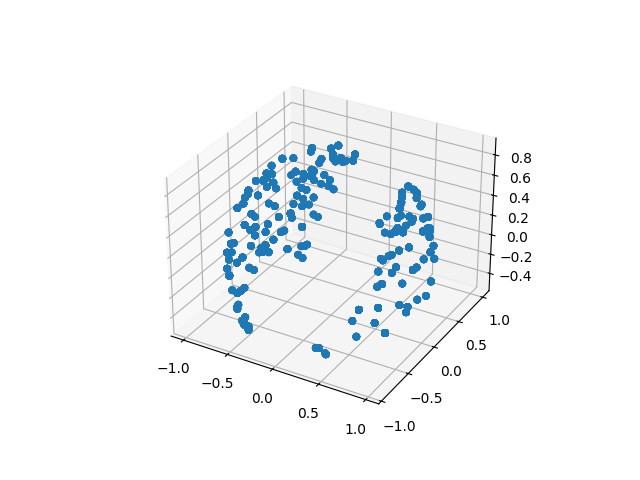

In [22]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(
    features.loc[['aid_' + oid for oid in to_be_replaced]]['Coordinate_x_nan'],
    features.loc[['aid_' + oid for oid in to_be_replaced]]['Coordinate_y_nan'],
    features.loc[['aid_' + oid for oid in to_be_replaced]]['Coordinate_z_nan']
)

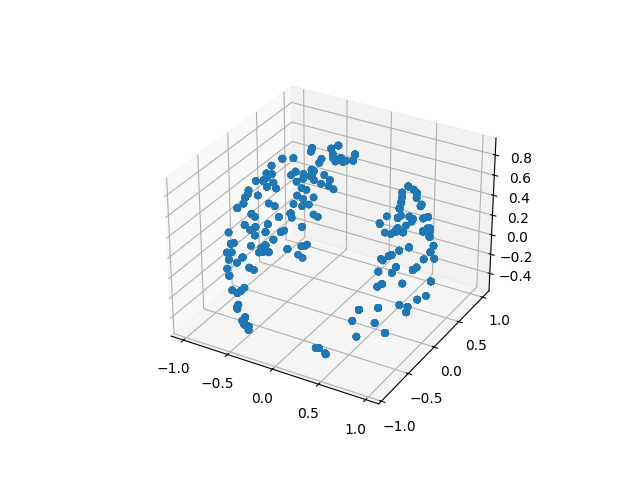

In [23]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(
    features.loc[['aid_' + oid for oid in not_to_be_replaced]]['Coordinate_x_nan'],
    features.loc[['aid_' + oid for oid in not_to_be_replaced]]['Coordinate_y_nan'],
    features.loc[['aid_' + oid for oid in not_to_be_replaced]]['Coordinate_z_nan']
)

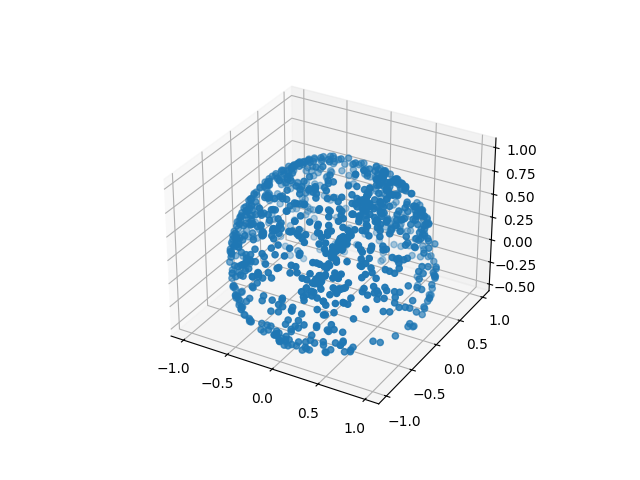

In [24]:
sample = features.sample(1000)
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(
    sample['Coordinate_x_nan'],
    sample['Coordinate_y_nan'],
    sample['Coordinate_z_nan'],
)